In [301]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [ ]:
X , y = make_classification(n_samples=100, # No of rows
                            n_features=2,  # No of columns in X 
                            n_informative=1, # No of columns in X
                            n_redundant=0, # No of redundant columns in X
                            n_classes=2, # No of labels in y column
                            n_clusters_per_class=1, # No of clusters in each class
                            hypercube=False, # If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
                            class_sep=10, # Seperatin distance per class
                            random_state = 3
                            )

# Note : Experiment with random values to make sure we get a better grasp about each algorithm and their differences.

In [303]:
X.shape,y.shape # Shape of the dataset made

((100, 2), (100,))

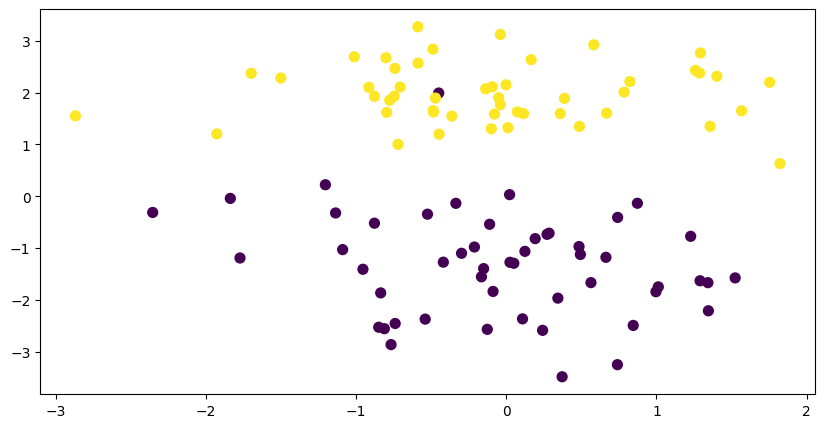

In [304]:
plt.figure(figsize=(10,5)) 
plt.scatter(X[:,0],X[:,1],c=y,s=50) # Plotting the X points 
plt.show()

In [305]:
# Now creating the perceptron from scratch 
class pereceptron:
    def __init__(self,learning_rate=0.1,epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None

        # Arrays for m and b in each iteration
        self.m = []
        self.b = []
    def step(self,z):
        return 1 if z>0 else 0
    
    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1) # Creates a column for the coeffecients of w
        w = np.ones(X.shape[1]) # Creates a matrix (1 * n ) where n is the value passed

        # Now iterating over epochs times:
        for i in range(self.epochs):
            # As the formula : Wnew = Wold - lr*(y - y_hat)*X

            # First lets pick the random point index for the iteration
            j = np.random.randint(0,X.shape[0])

            # Second creating y_hat
            y_hat = self.step(np.dot(X[j],w))

            # Now lets upadte w value . 
            w = w + self.lr*(y[j] - y_hat)*X[j]

            self.coef = w[1:]
            self.intercept = w[0]
            
            # The process we did explicilty will be done here automatically
            self.m.append(-(w[1]/w[2])) 
            self.b.append(-(w[0]/w[1]))

        return f"Intercept : {w[0]}  Coeffecient : {w[1:]}"
    
    def params(self):
        return self.m,self.b

        

In [306]:
prc = pereceptron() # Instantiate the perceptron

In [307]:
prc.fit(X,y) # fit the data

'Intercept : -0.09999999999999992  Coeffecient : [0.05350518 0.37722492]'

In [308]:
# Now lets plot the line that is acting like a seperation boundary for classification
# For this lets first calculate m and b value

m = - ( prc.coef[0] / prc.coef[1] ) # m = - A/B
b = - ( prc.intercept / prc.coef[1] ) # b = - C/B

In [309]:
# Now making x and y values for the line equation
x_ip = np.linspace(-3,3,X.shape[0]) # (-y boundary, + y boundary ,X.shape[0])
y_ip = (m*x_ip)+ b  # y = m*x + b

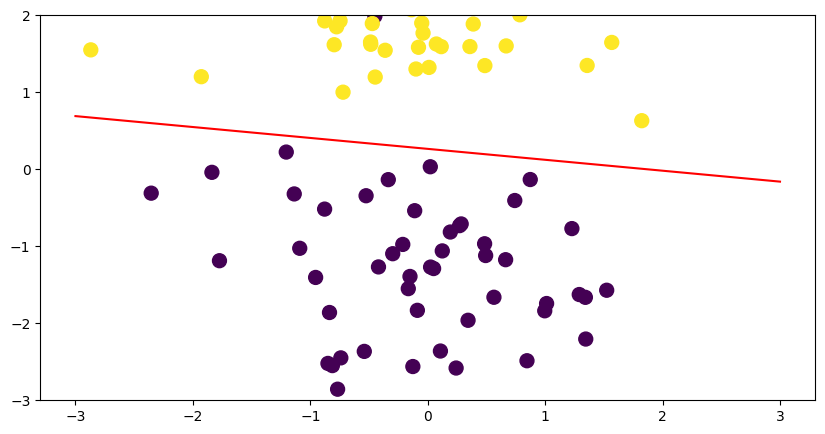

In [310]:
# Plotting the same graph as above but with the line
plt.figure(figsize=(10,5))
plt.plot(x_ip,y_ip,c='r') # Plotting the line we created with the coef of m and b 
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.ylim(-3,2) # Sets the y limit for both the axes 
plt.show()

In [311]:
# Acessing m and b of each iteration
# Note this is just made for accessing and making animations using FuncAnimation for the above which maybe done in future
m ,b = (prc.params())  

In [312]:
# Now lets compare this with the Logistic Regression and understand why this method is incomplete .
lor = LogisticRegression()

In [313]:
lor.fit(X,y) # Fitting the params

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [314]:
lor.coef_,lor.intercept_

(array([[0.29177184, 2.51034039]]), array([-1.34193566]))

In [315]:
# Now lets create the same m and b and also y_ip_lor and x_ip_lor for this too to create a line
m_lor = - (lor.coef_[0][0] / lor.coef_[0][1])
b_lor = - (lor.intercept_[0] / lor.coef_[0][1]) 

x_ip_lor = np.linspace(-3,3,X.shape[0])
y_ip_lor = (m_lor*x_ip_lor) + b_lor

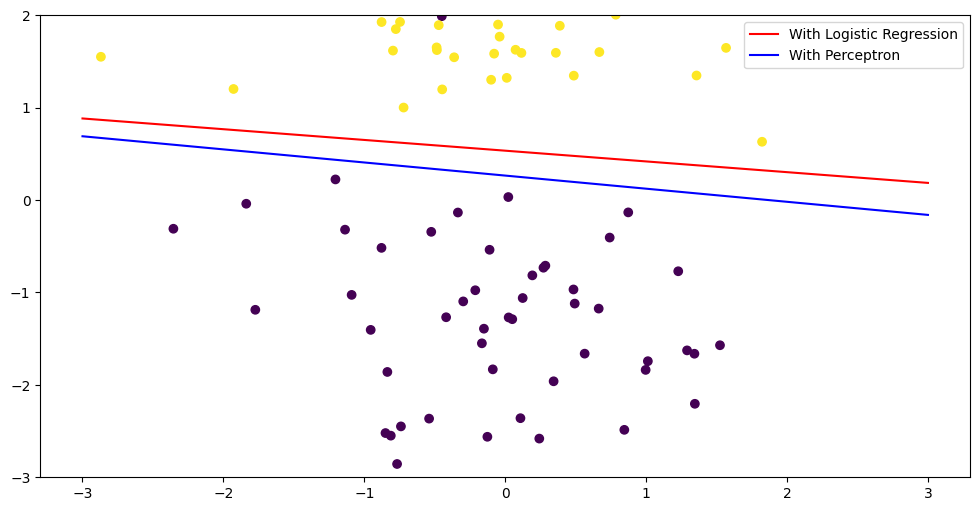

In [316]:
# Now lets plot the same graph and look for the difference between the two lines
plt.figure(figsize=(12,6))
plt.plot(x_ip_lor,y_ip_lor,c='red', label='With Logistic Regression')
plt.plot(x_ip,y_ip,c='blue',label='With Perceptron')
plt.scatter(X[:,0],X[:,1:],c=y)
plt.ylim(-3,2) # This is important without this we are not setting lime limitations and graph will look different
plt.legend()
plt.show()

In [317]:
# We can clearly see why Logistic Regression is used as it creates a symmetrical diversion between the classes .
# Therefore we need to devise such method that can not only perfctly  classify but also make the distinguation perfect .

In [318]:
# Now we will make changes in the class we made so that we can fit using both the methods step and sigmoid

class pereceptron:
    def __init__(self,learning_rate=0.1,epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None

        # Arrays for m and b in each iteration
        self.m = []
        self.b = []
    def step(self,z):
        return 1 if z>0 else 0
    
    def sigmoid(self,z):
        return 1/(1+(np.exp(-z)))
    

    def fit(self,X,y,method='step'):
        X = np.insert(X,0,1,axis=1) # Creates a column for the coeffecients of w
        w = np.ones(X.shape[1]) # Creates a matrix (1 * n ) where n is the value passed

        # Now iterating over epochs times:
        for i in range(self.epochs):
            # As the formula : Wnew = Wold - lr*(y - y_hat)*X

            # First lets pick the random point index for the iteration
            j = np.random.randint(0,X.shape[0])

            # Second creating y_hat either by step function or sigmoid function
            
            # I added this cause I wanted a function to act upon my method with step function as default
            if method == 'sigmoid':
                y_hat = self.step(np.dot(X[j],w))
            
            else :
                y_hat = self.sigmoid(np.dot(X[j],w))

            # Now lets upadte w value . 
            w = w + self.lr*(y[j] - y_hat)*X[j]

            self.coef = w[1:]
            self.intercept = w[0]
            
            # The process we did explicilty will be done here automatically
            self.m.append(-(w[1]/w[2])) 
            self.b.append(-(w[0]/w[1]))

        return f"Intercept : {w[0]}  Coeffecient : {w[1:]}"
    
    def params(self):
        return self.m,self.b

        

In [319]:
perc1 = pereceptron() # Instantiate like usual as seen above 

In [320]:
perc1.fit(X,y,method='sigmoid') # Pass the parameter sigmoid 

'Intercept : -0.3999999999999999  Coeffecient : [-0.03584187  0.39881887]'

In [321]:
perc1.fit(X,y,method='step') # Pass step,or even if something else is passed the default is step

'Intercept : -1.3499894581618859  Coeffecient : [0.51849952 3.35014447]'

In [322]:
# Again calculating the value of m and b for sigmoid
m_sig = - (perc1.coef[0]/perc1.coef[1])
b_sig = - (perc1.intercept/perc1.coef[1])

In [323]:
# Again creating a line for plotting the classification
x_ip_sig = np.linspace(-3,3,100)
y_ip_sig = (m_sig*x_ip_sig) + b_sig


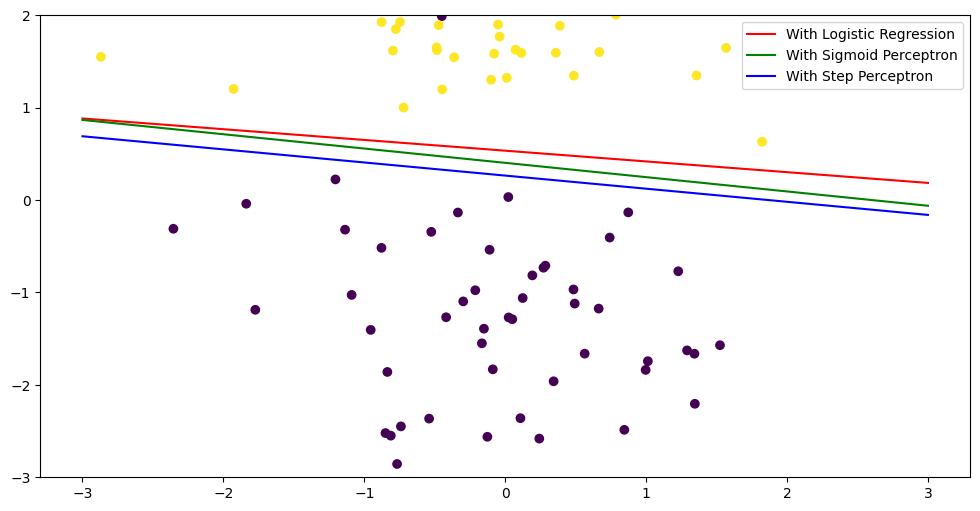

In [324]:
# Now we will compare all the lines we have predicted till now by step , sigmoid and Logistic Regression
# Same plotting steps as we did earlier 
plt.figure(figsize=(12,6))
plt.plot(x_ip_lor,y_ip_lor,c='red', label='With Logistic Regression')
plt.plot(x_ip_sig,y_ip_sig,c='green', label='With Sigmoid Perceptron')
plt.plot(x_ip,y_ip,c='blue',label='With Step Perceptron')
plt.scatter(X[:,0],X[:,1:],c=y)
plt.ylim(-3,2) # *** #
plt.legend()
plt.show()

In [ ]:
# As we can see the sigmoid is good but still not the best ,
#  so we need even better strategy to be implemented to reach the level of Logistic Regression.